<a href="https://colab.research.google.com/github/aryanfaghihi/ai-course/blob/master/Image%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Make a copy

**Follow the following steps to make your own copy. You will lose your changes if you don't make your own copy!**

From the tooltip above, you should see 

File | Edit | View | Insert | Runtime | Tools | Help

1. Click on **File**
2. Click on **Save a copy in Drive**

## Import

Let's import the required packages and setup some settings that will help us in this notebook.

In [ ]:
# import the required packages
from fastai.vision import *
from google.colab import files

# Data

Today, we will be creating another `classifier`. It will be able to classify different breeds of cats and dogs. More information on the **Pets dataset** [here](https://www.robots.ox.ac.uk/~vgg/data/pets/).

Let's download the dataset first.

In [71]:
# download and extract the dataset
path = untar_data(URLs.PETS)

Next, we will view the folder structure to see where the `images` can be found

In [ ]:
# view the folder structure
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

Let's read the images from the `images` folder

In [73]:
# import the images from `/images` folder
images = ImageList.from_folder(path/'images')

It's always a good idea to plot a batch of images to make sure everything is working.

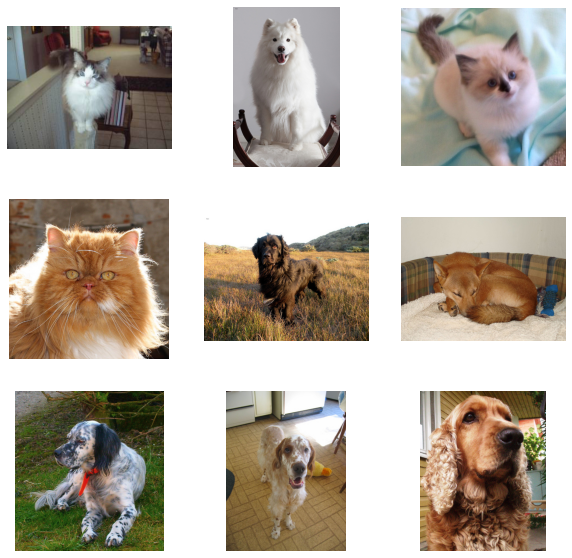

In [94]:
# CHANGE these values to get more images
rows = 3
columns = 3

# DON'T CHANGE THIS PART
_, axs = plt.subplots(rows, columns, figsize=(10,10))
for i,ax in enumerate(axs.flatten()): 
  images[i].show(ax=ax)

You will notice that images are missing labels, but that's ok. We will add the labels later. For now, we will shift our focus on **Augmentation**.

## Augmentation

Data augmentation is one of the most important techniques used when training a model for Computer Vision. Instead of feeding the model with the same images, we will alter these images slightly so that the model's prediction can be more generalised. 

Augmentation could be as simple as flipping an image horizontally or changing the brightness of an image. Basically anything that changes the image enough to be considered a *different* image but the object within the image is still recognisable.

> Augmentation is a great technique to increase the size of your dataset without having to download more images

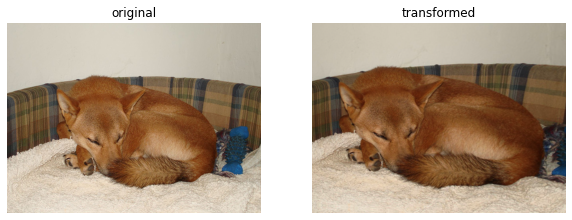

In [100]:
# create a list of recommended transforms
tfsm = get_transforms()

# pick an image
img = images[5]

# apply transforms
transformed_img = img.apply_tfms(tfsm[0])

# view the original and transformed image
_, axs = plt.subplots(1, 2, figsize=(10,10))
img.show(axs[0], title='original')
transformed_img.show(axs[1], title='transformed')

---

What changes can you see? 

Try running the cell again, do you see the same transformed image? Why do you think that is?

---

Next we will look at a few common augmentations.

### Flip

As the name suggests, a horizontal is one of the most common augmentations. This is because a horizontal flip generally does not fundamentally change the meaning of an image.

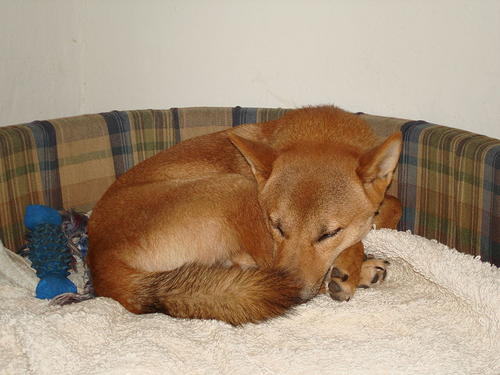

In [101]:
# flip horizantally
flip_tfm = [flip_lr()]

# apply the transform
img.apply_tfms(flip_tfm)

---

Can you think of an image that is not logical to be horizontally flipped?

---

### Rotate

Rotating is also another populat augmentation. You could argue that flipping is a special case of rotation. In practice, rotation is usually between 30 and 60 degrees as most objects still remain recognisable with rotation.

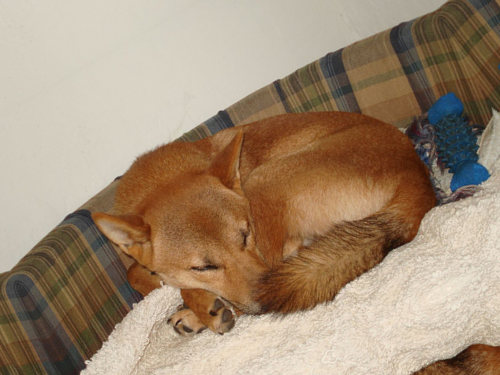

In [102]:
# rotate image
rotate_tfm = [rotate(degrees=30)]

# apply the transform
img.apply_tfms(rotate_tfm)

---

Can you think of an example where rotation fundamentally changes the meaning of an image?

---

### Zoom

Zooming is slightly less popular than the other two methods as it will remove valuable information from the image. Although you can argue that removing parts of the image will make the model more *robust*.

Only thing to keep in mind when using `zoom` us to make sure the object in the image is still *recognisable*. 

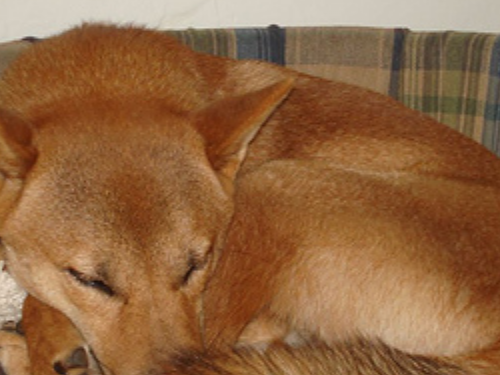

In [103]:
# zoom 2 times
zoom_tfm = [zoom(scale=2)]

# apply the transformation
img.apply_tfms(zoom_tfm)

### Brightness

Augmentating the brightness of the image is not as straightforward as the other techniques. You would have to be very careful how much you change the brightness by. You generally want to change the brightness by only 10-20% as this is not likely to make the image unrecognisable.

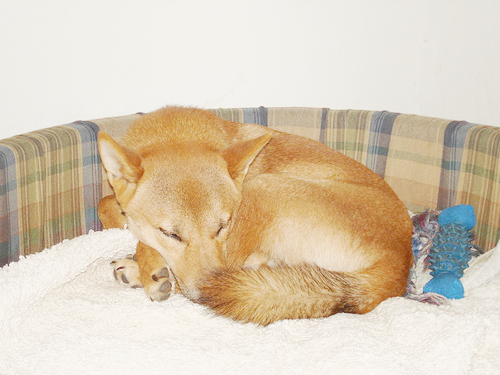

In [ ]:
# change brightness 
## change = 0.1 -> very dark
## change = 0.5 -> original
## change = 0.9 -> very bright
bright_tfm = [brightness(change=0.8)]

# apply the transformation
img.apply_tfms(bright_tfm)

### Warp

This is probably one of the coolest ones as it gives the image a different perspective. Again, you'd have to mindful of changing the persepective, the image, as always, needs to remain recognisable.

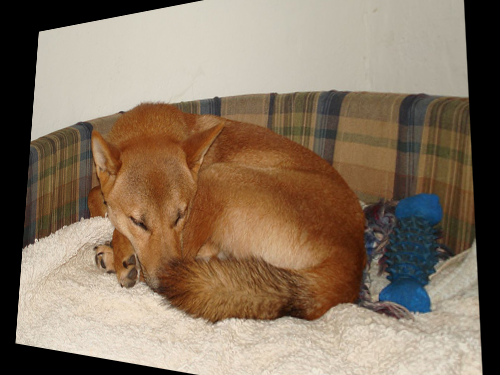

In [ ]:
# symmetric warp transformation
warp_tfm = [symmetric_warp(magnitude=(-0.3, 0.3))]

# apply the transformation
## padding_mode='zeros' adds dark pixels around the image
img.apply_tfms(warp_tfm, padding_mode='zeros')

### Jitter

Last one we will cover today is to add jitter to the image. Again, you'd want to only apply a reasonable magnitude of `jitter`.

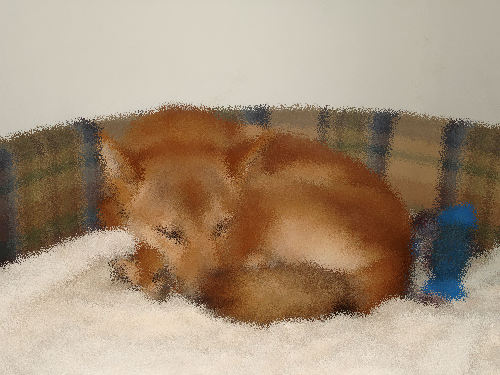

In [70]:
# jitter transformation
## magnitude is between -1 and 1
jit_tfm = [jitter(magnitude=0.02)]

# applt the transformation
img.apply_tfms(jit_tfm)

You might have noticed that we kept saying **recognisable**. This is super important. If you change the image so much that even *you* can't recognise the object in it, you should not expect the model to learn anything meaninful from it. 

Always think about the model as your little sibling and that you are trying to teach them about various objects. You should not expect the model to have super-intelligence. It's all about pattern recognition! (we humans are pretty good at that).